In [1]:
import numpy as np
import cv2 as cv
import va

""
""

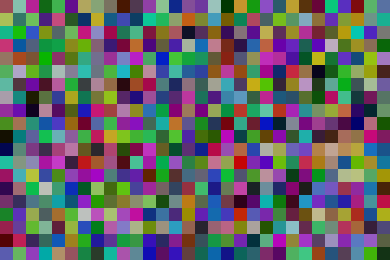

In [18]:
img = np.random.randint(1, 200, (20, 30, 3), dtype=np.uint8)
va.show(img)

original,simple threshold,OTSU,adaptive
,,,

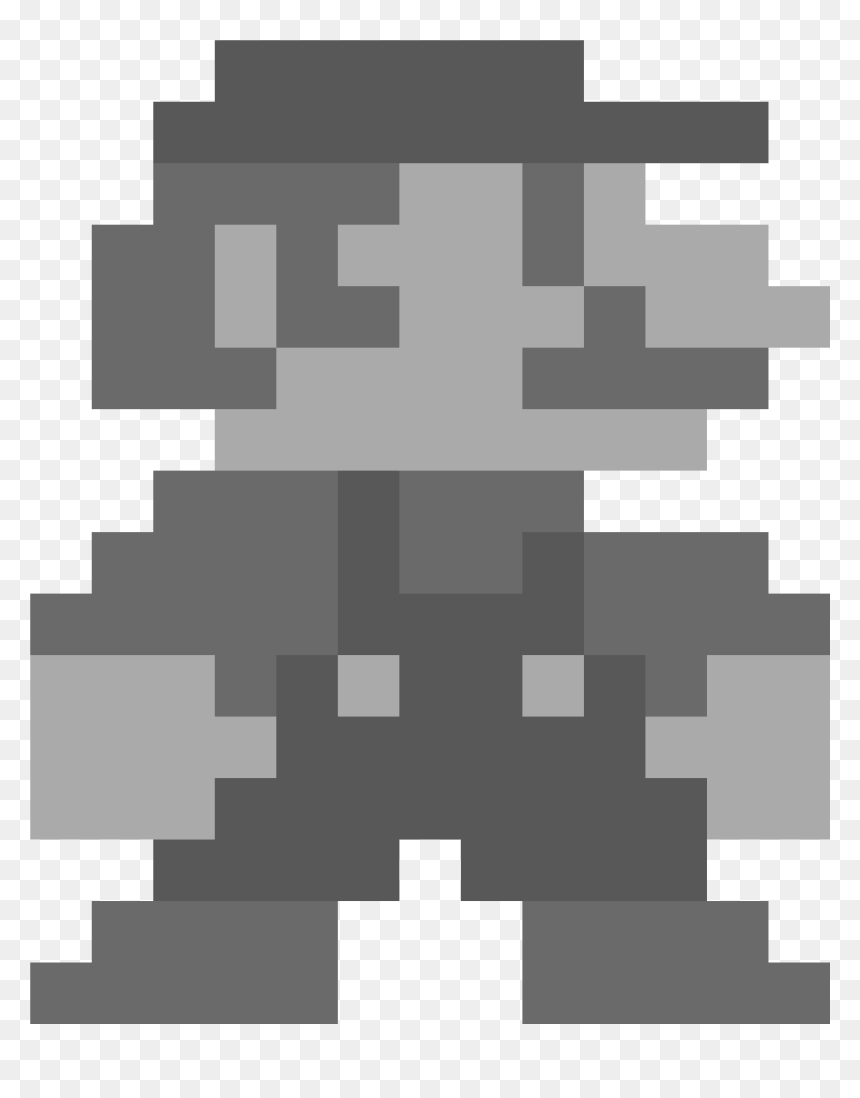
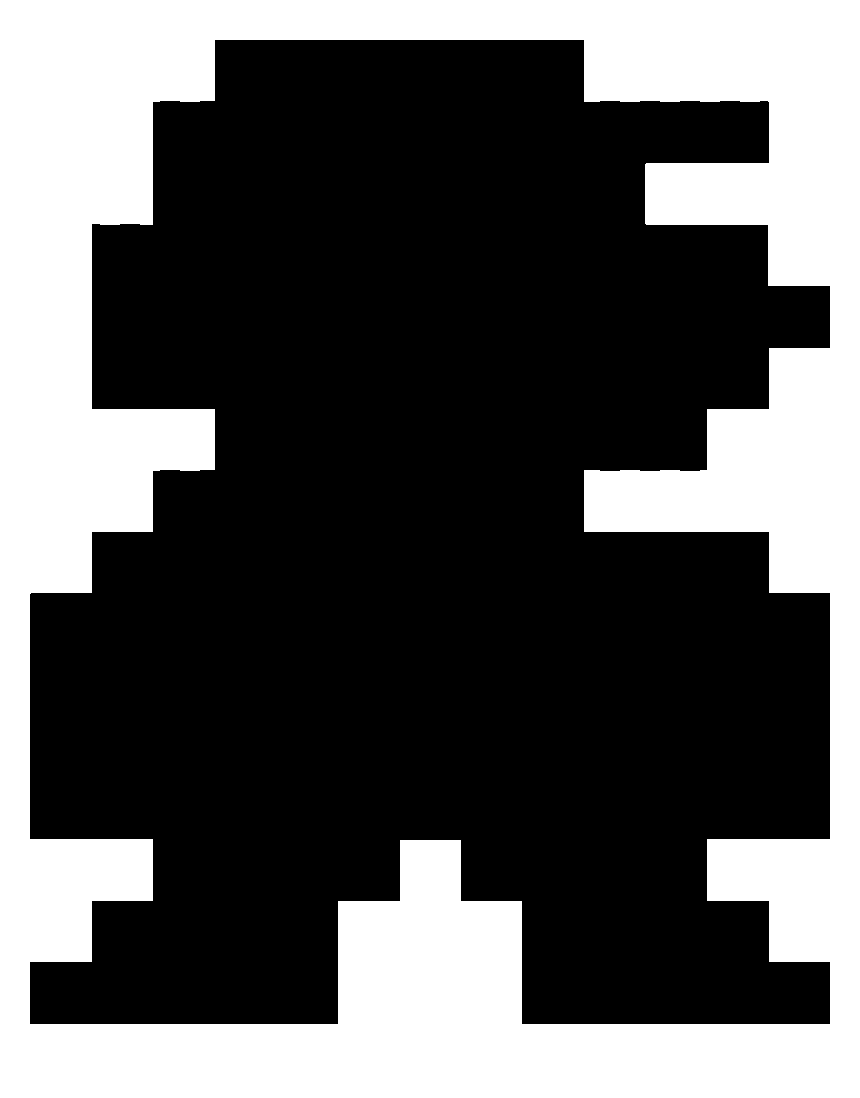
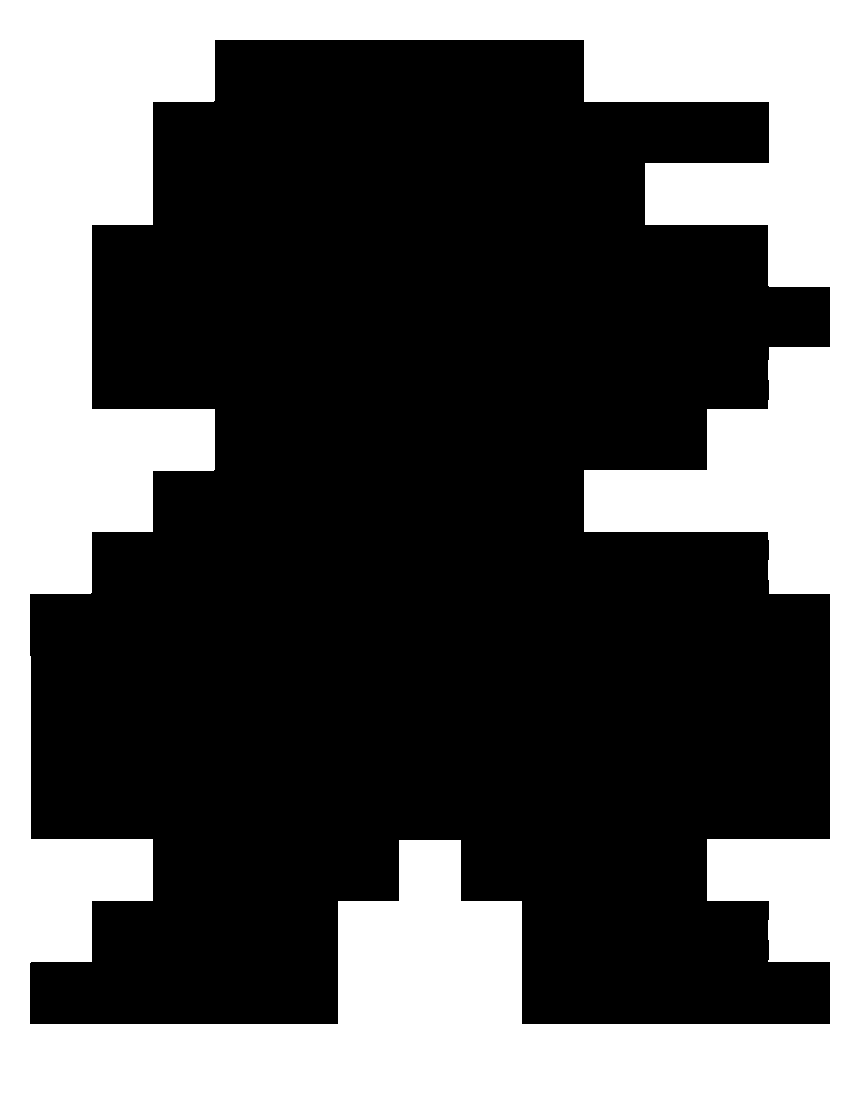
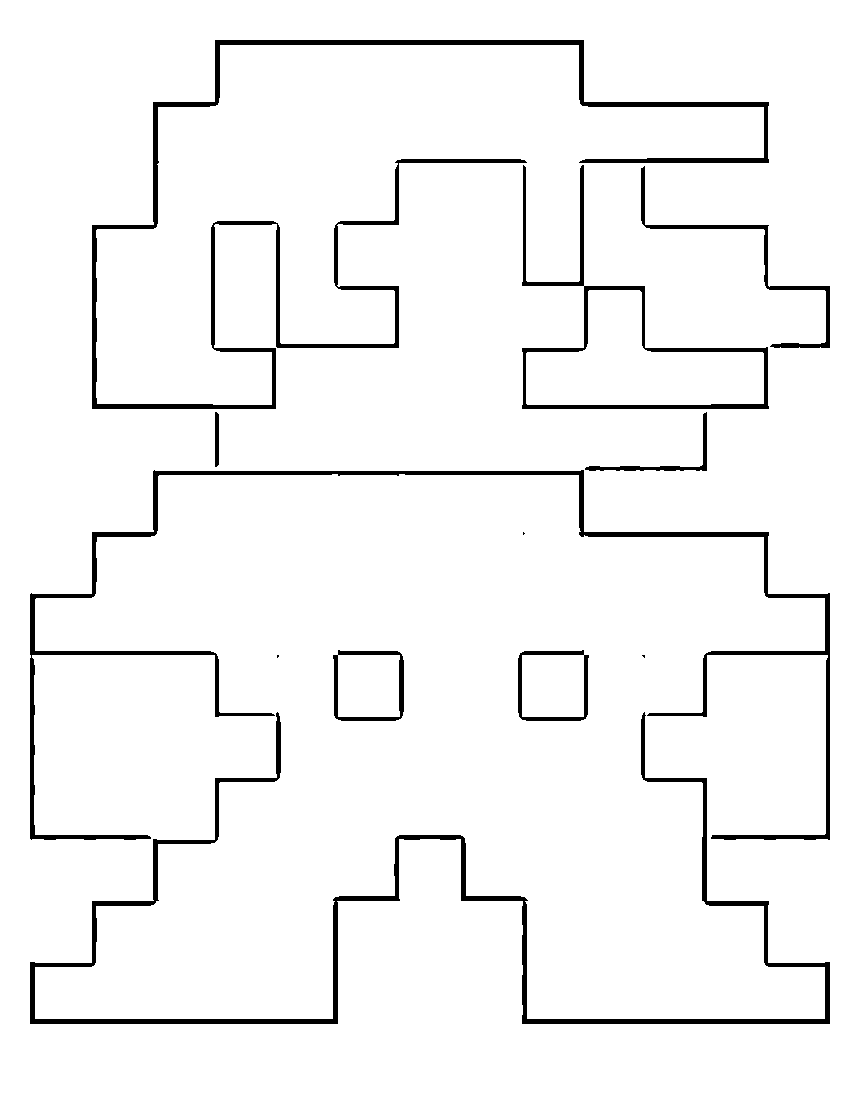

In [7]:
img = cv.imread("./mario2.png", cv.IMREAD_GRAYSCALE)
_, b1 = cv.threshold(img, 200, 255, cv.THRESH_BINARY)
_, b2 = cv.threshold(img, -1, 255, cv.THRESH_OTSU)
b3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 10)
#11: Grandezza intorno su cui fare la media, 10: Valore da SOTTRARRE alla media 
va.show((img, "original"), (b1, "simple threshold"), (b2, "OTSU"), (b3, "adaptive"))

""
""

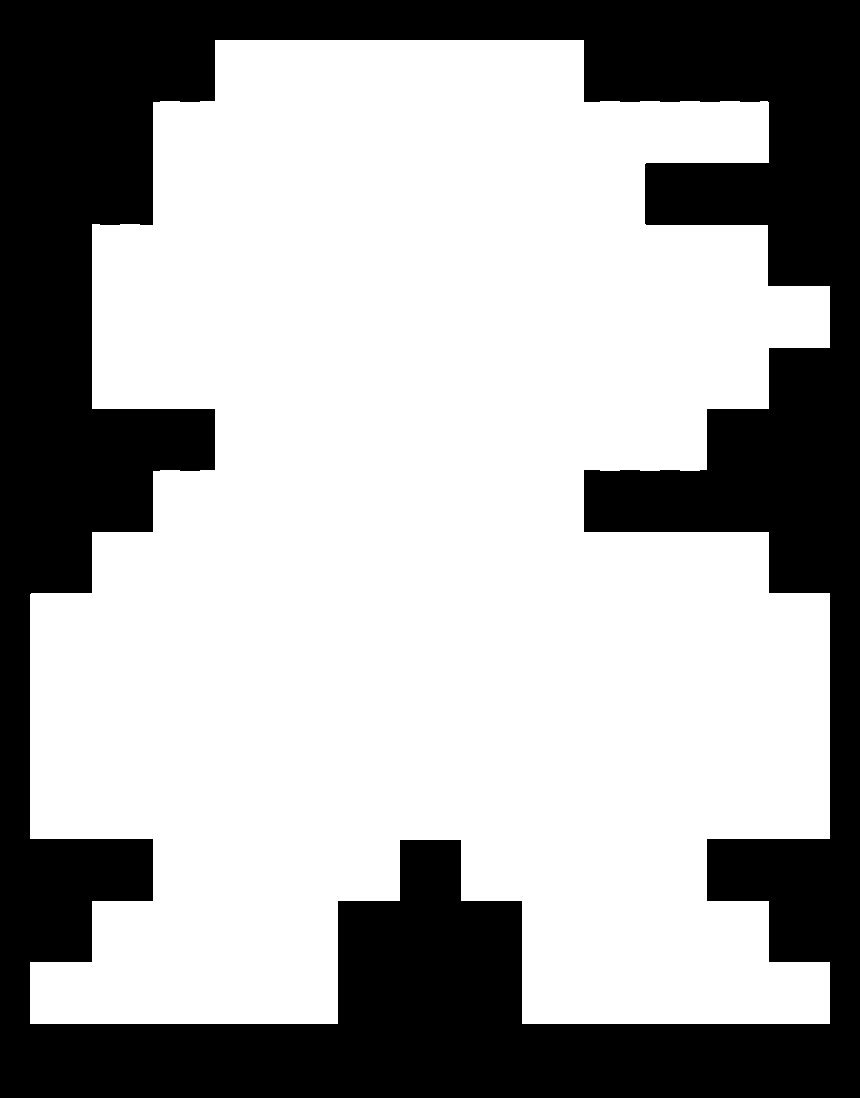

In [27]:
Ori_img = cv.imread("./mario2.png", cv.IMREAD_GRAYSCALE)
_, img = cv.threshold(Ori_img, 200, 255, cv.THRESH_BINARY_INV)
va.show(img)

[[0 1 0]
 [0 0 0]
 [0 0 0]]


kernel,image
,

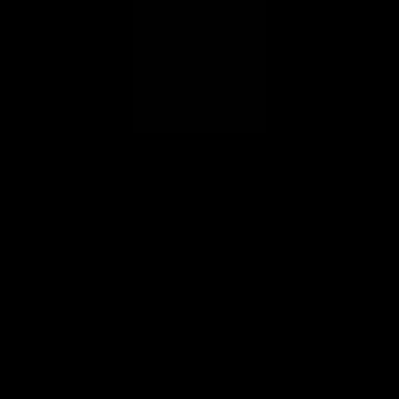
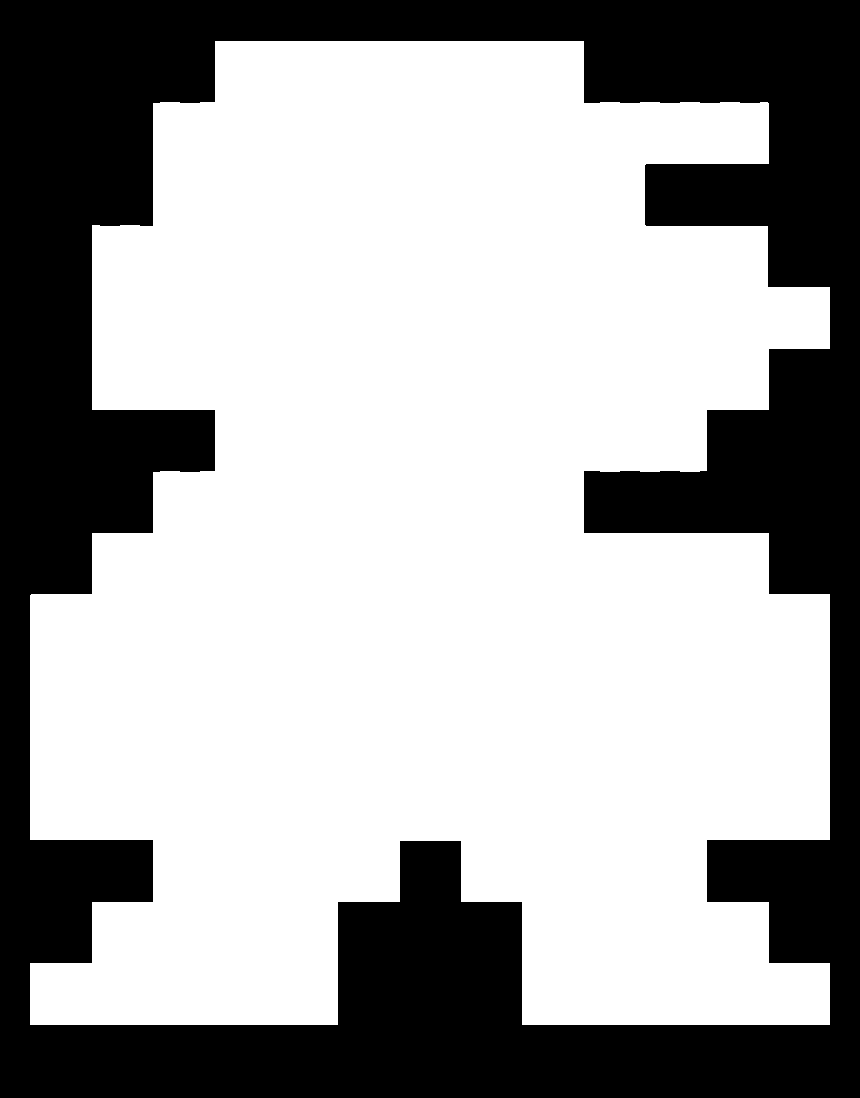

In [43]:
kern = np.zeros((3,3), dtype=np.uint8)
kern[0,1] = 1
print(kern)
nimg = cv.filter2D(img, -1, kern)
va.show((kern, "kernel"), (nimg, "image"))

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


kernel,image
,

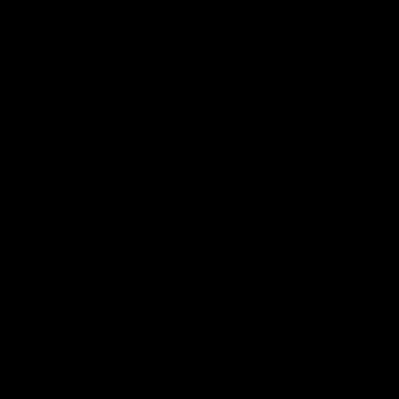
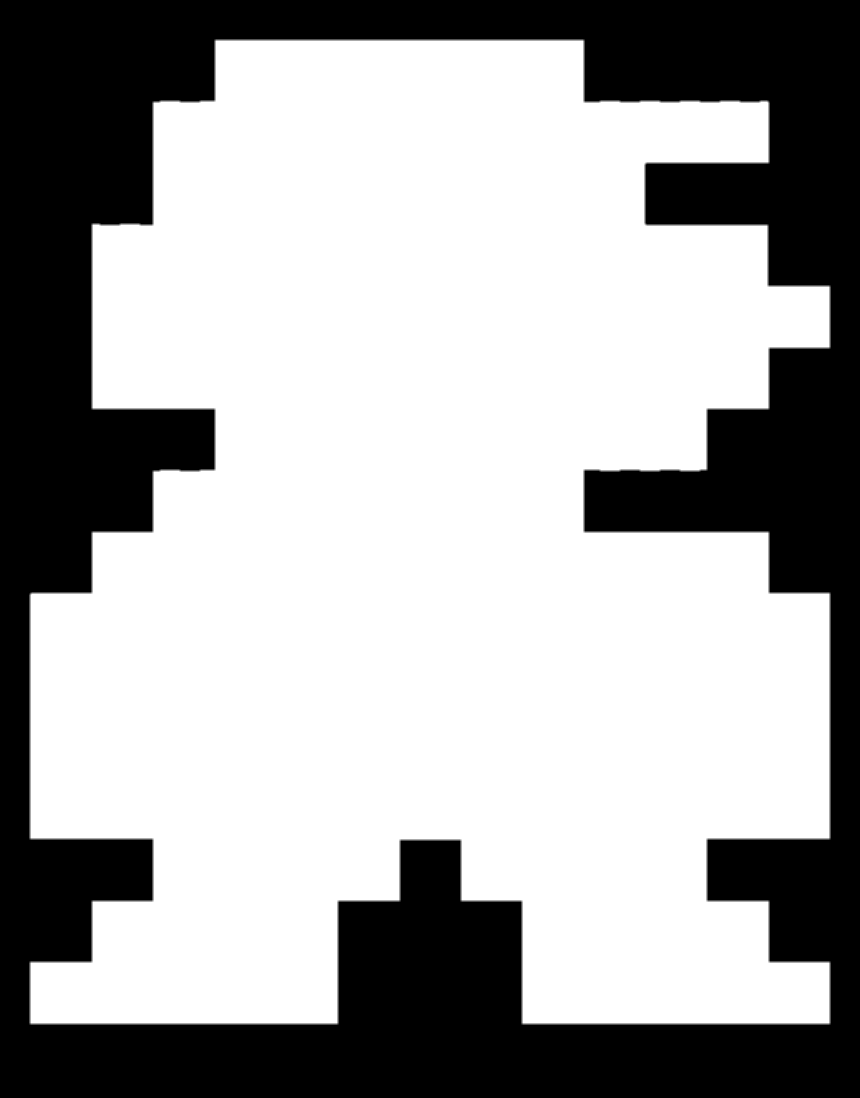

In [42]:
kern2 = np.ones((3,3), dtype=np.float32)
kern2 = 1/(kern2.sum()) * kern2
print(kern2)
nimg = cv.filter2D(img, -1, kern2)
va.show((kern2, "kernel"), (nimg, "image"))

kernel,image
,

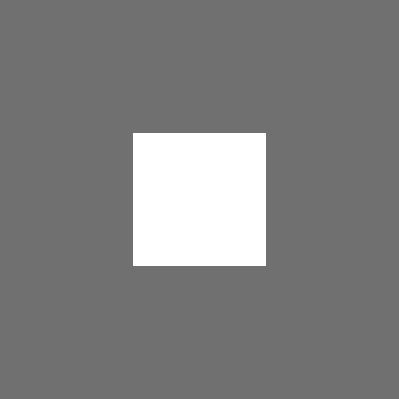
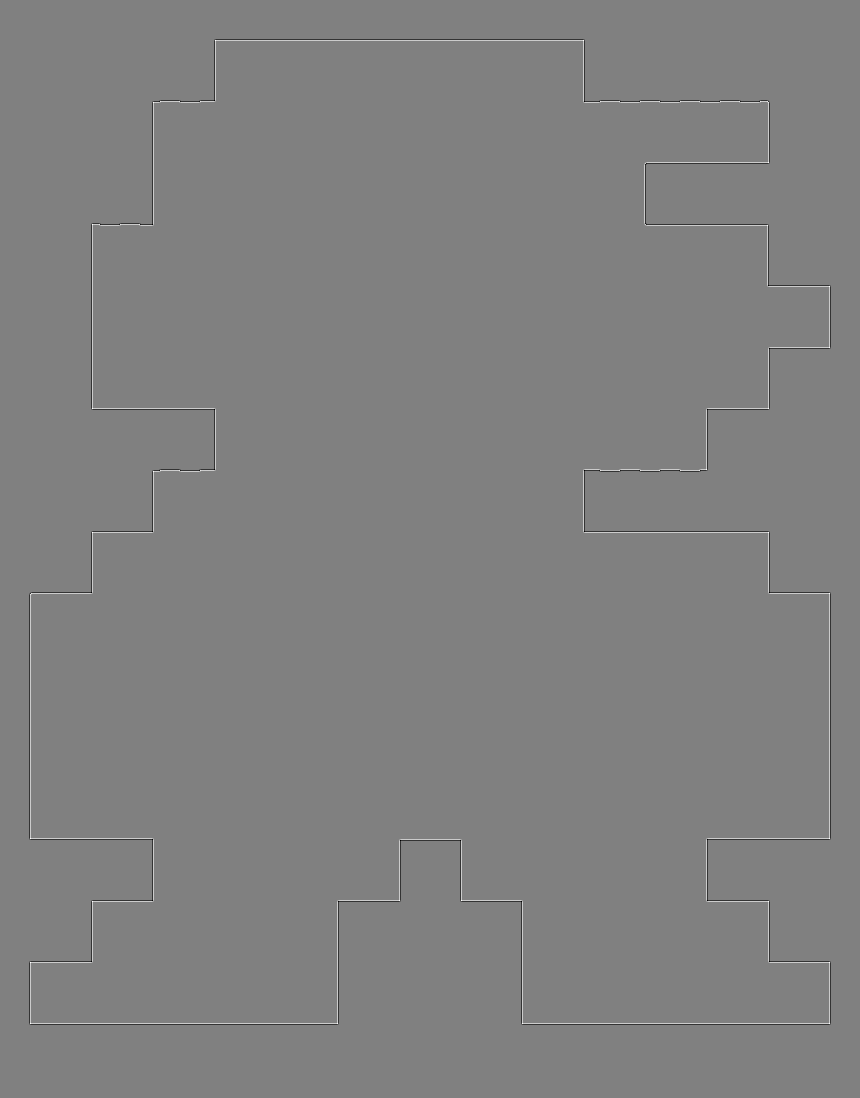

In [41]:
x, y = 3, 3
kern3 = np.full((x,y), -1)
kern3[y//2, x//2] = 8
nimg = cv.filter2D(img, cv.CV_16S, kern3)
va.show((kern3, "kernel"), (nimg, "image"))


kernel,image
,

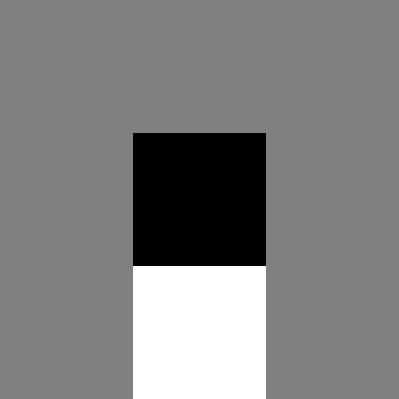
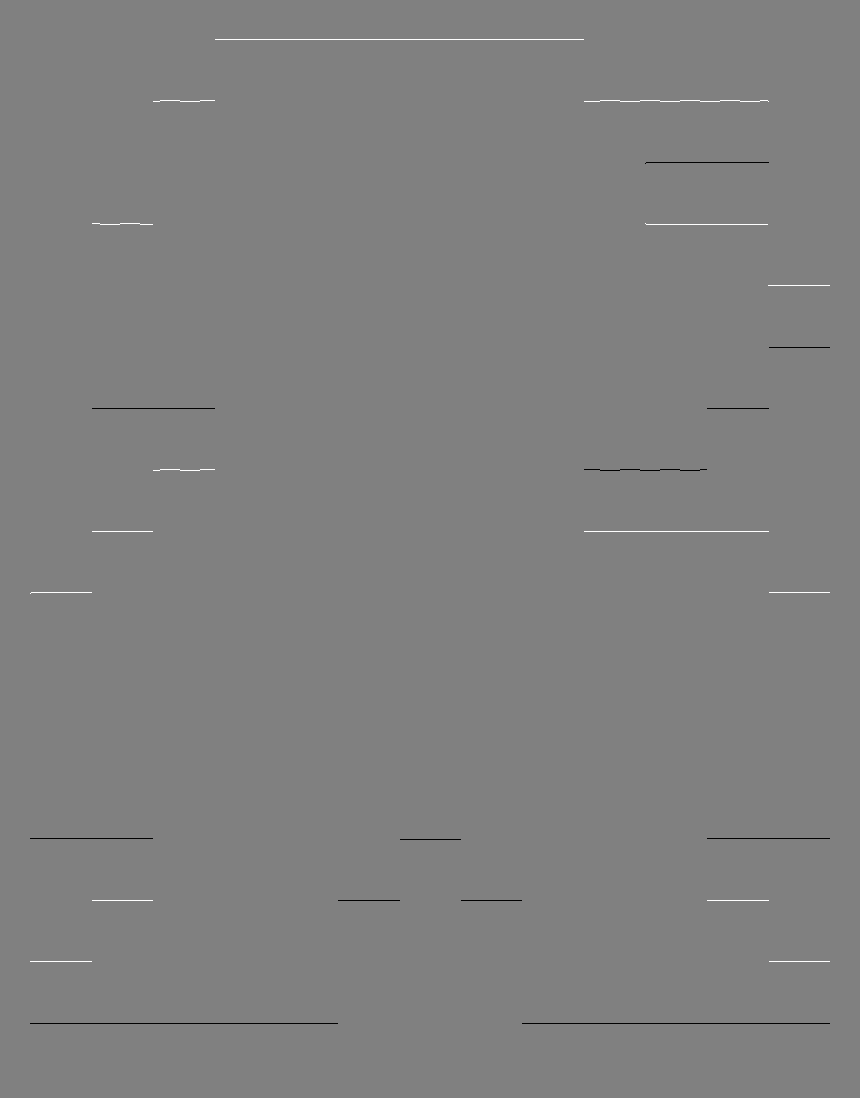

In [40]:
x, y = 3, 3
kern4 = np.zeros((x,y))
kern4[y//2, x//2] = -1
kern4[y-1, x//2] = 1
nimg = cv.filter2D(img, cv.CV_16S, kern4)
va.show((kern4, "kernel"), (nimg, "image"))


kernel,image
,

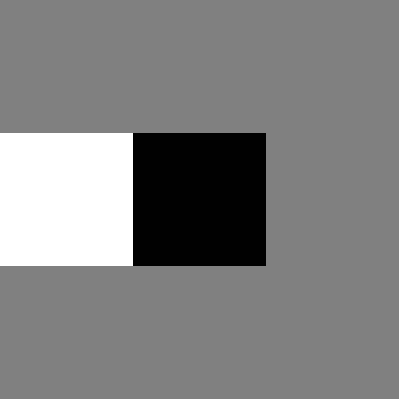
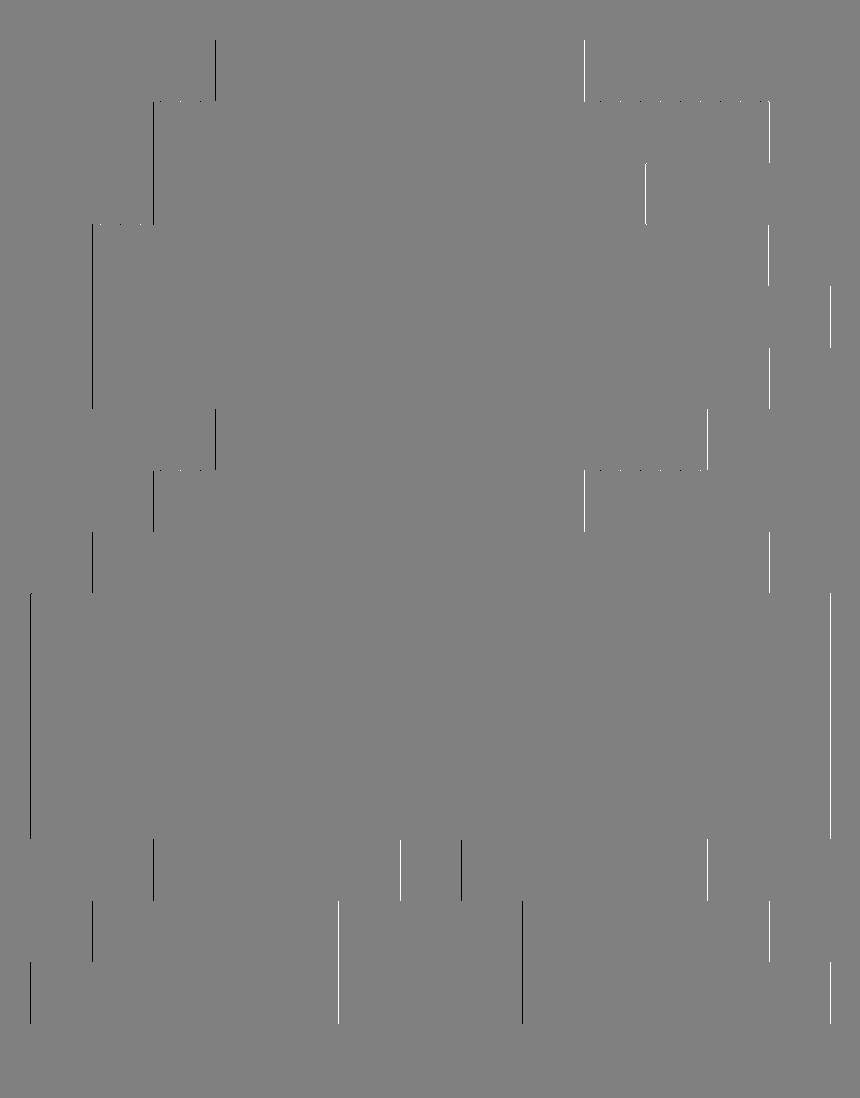

In [38]:
x, y = 3, 3
kern5 = np.zeros((x,y))
kern5[y//2, x//2] = -1
kern5[y//2, 0] = 1
nimg = cv.filter2D(img, cv.CV_16S, kern5)
va.show((kern5, "kernel"), (nimg, "image"))


## Box Filter

""
""

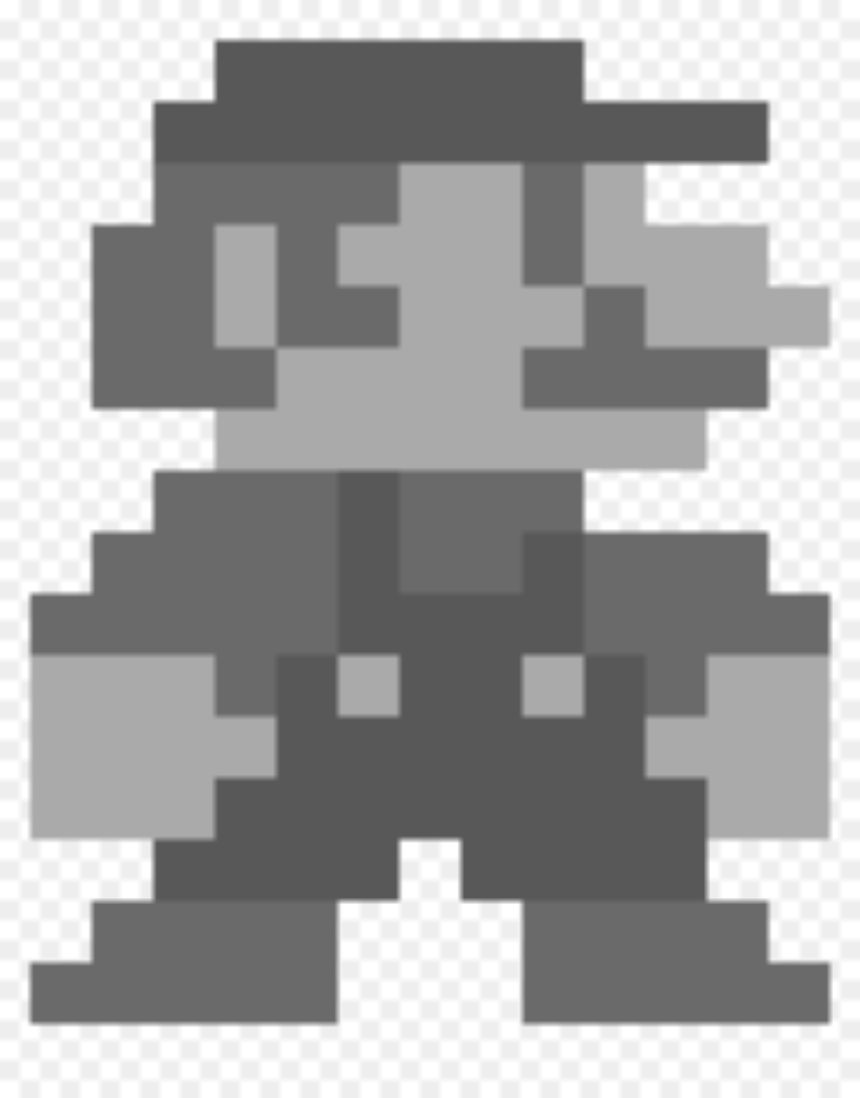

In [46]:
blr = cv.boxFilter(Ori_img, -1, (7,7))
va.show(blr)

filter,image,blurred
,,

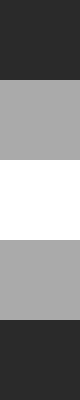
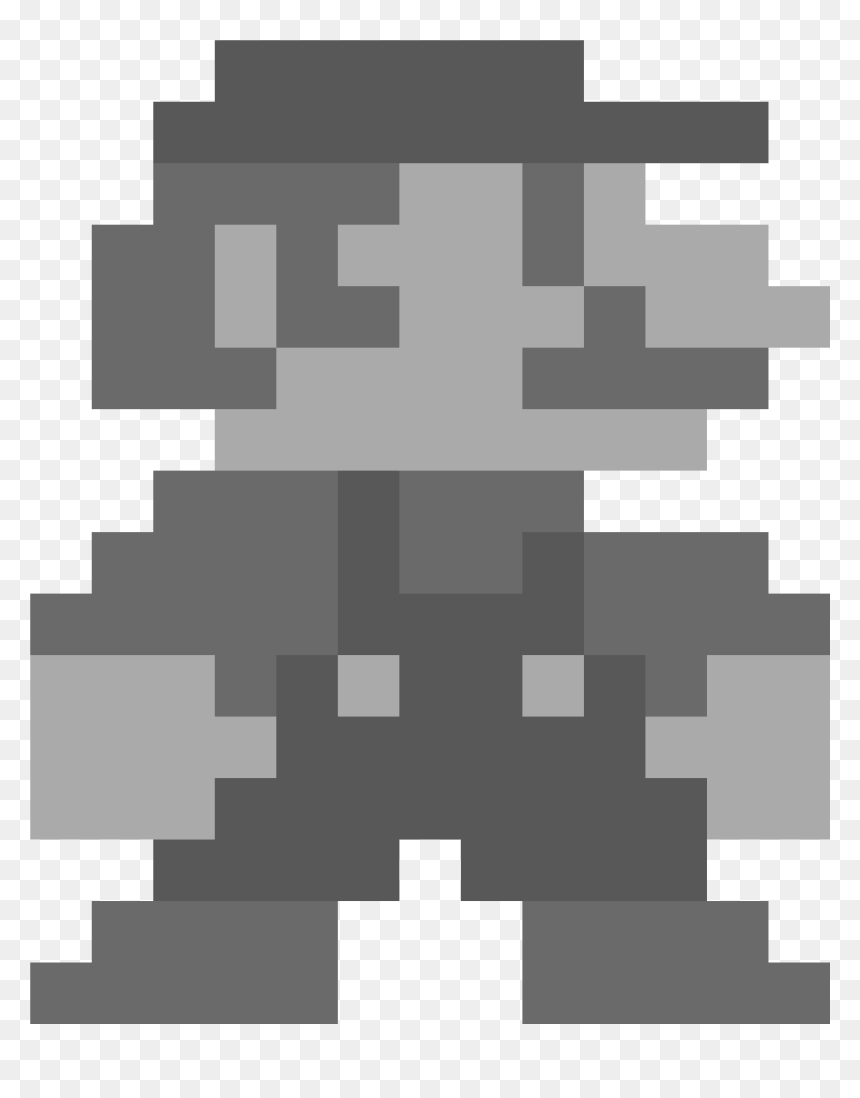
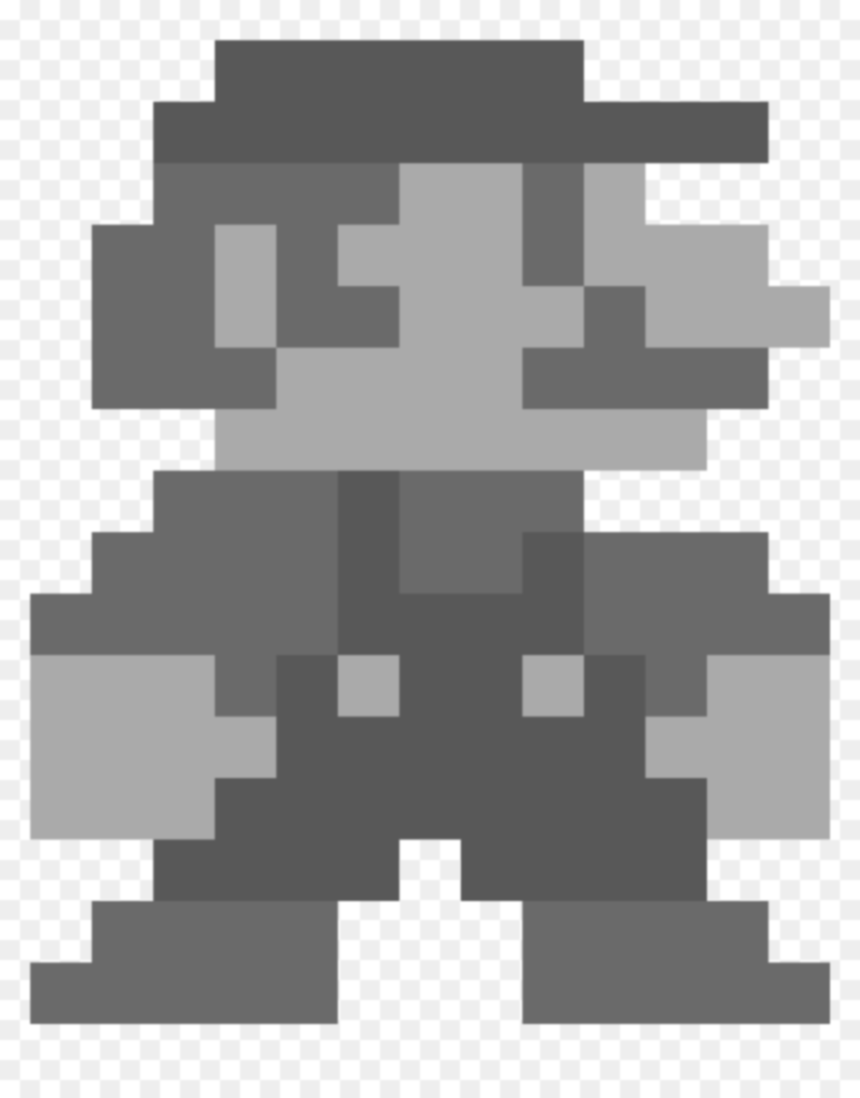

In [56]:
g = cv.getGaussianKernel(5, -1)
g_blur = cv.sepFilter2D(Ori_img, -1, g, g)
va.show((g, "filter"), (Ori_img, "image"),(g_blur, "blurred"))

image,blurred
,

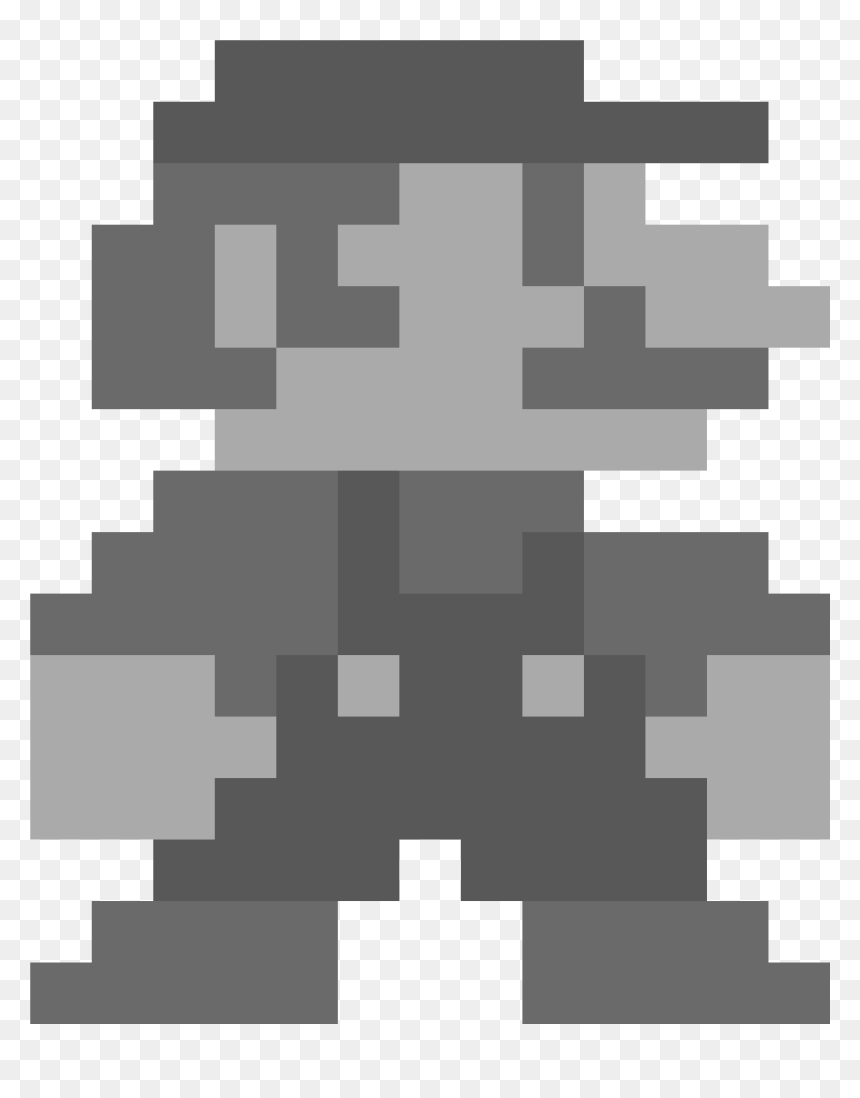
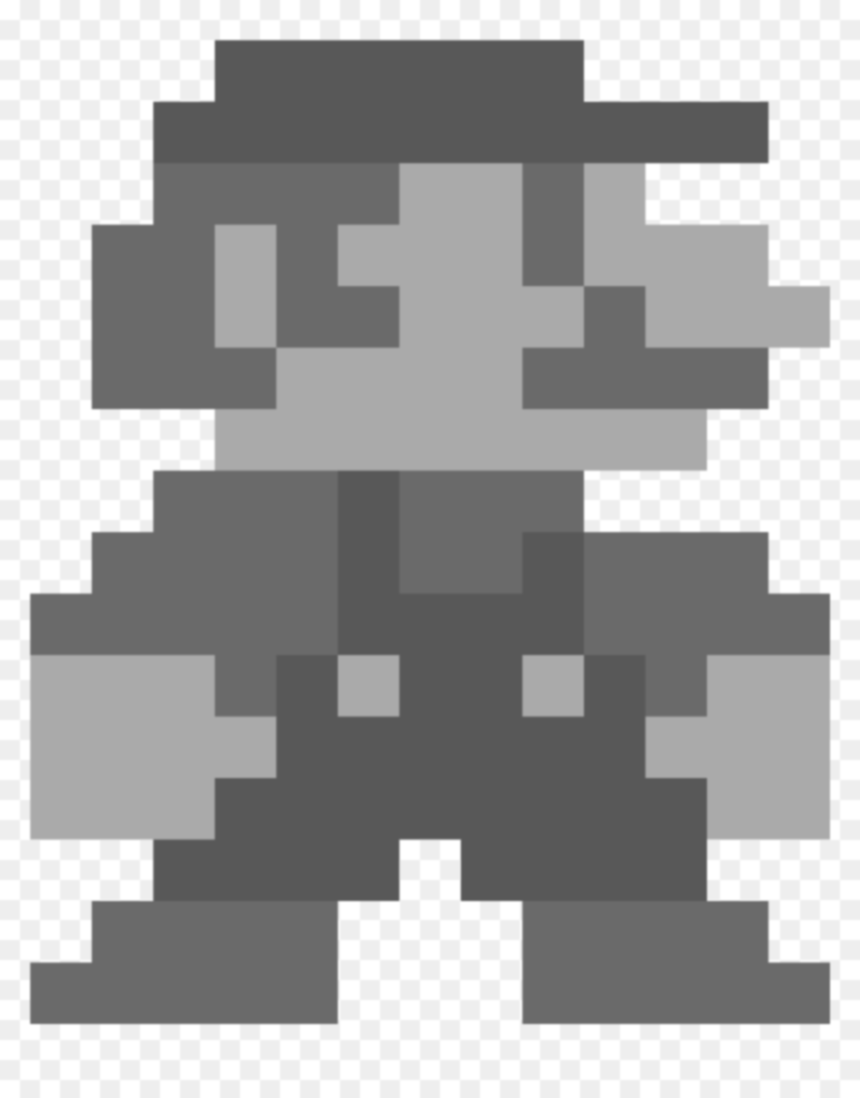

In [58]:
g_blur = cv.GaussianBlur(Ori_img, (5,5), -1)
va.show((Ori_img, "image"),(g_blur, "blurred"))

filter
""

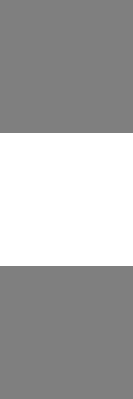

filter
""

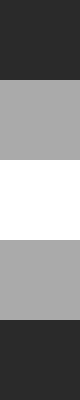

filter
""

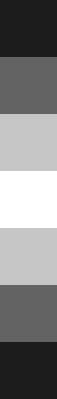

filter
""

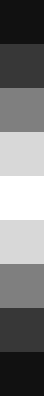

In [63]:
for k in range(3, 11, 2):
    g = cv.getGaussianKernel(k, -1)
    va.show((g, "filter"))

## Bordi

Filtro derivata X: [-0.5  0.   0.5]


derivata lungo la x
""

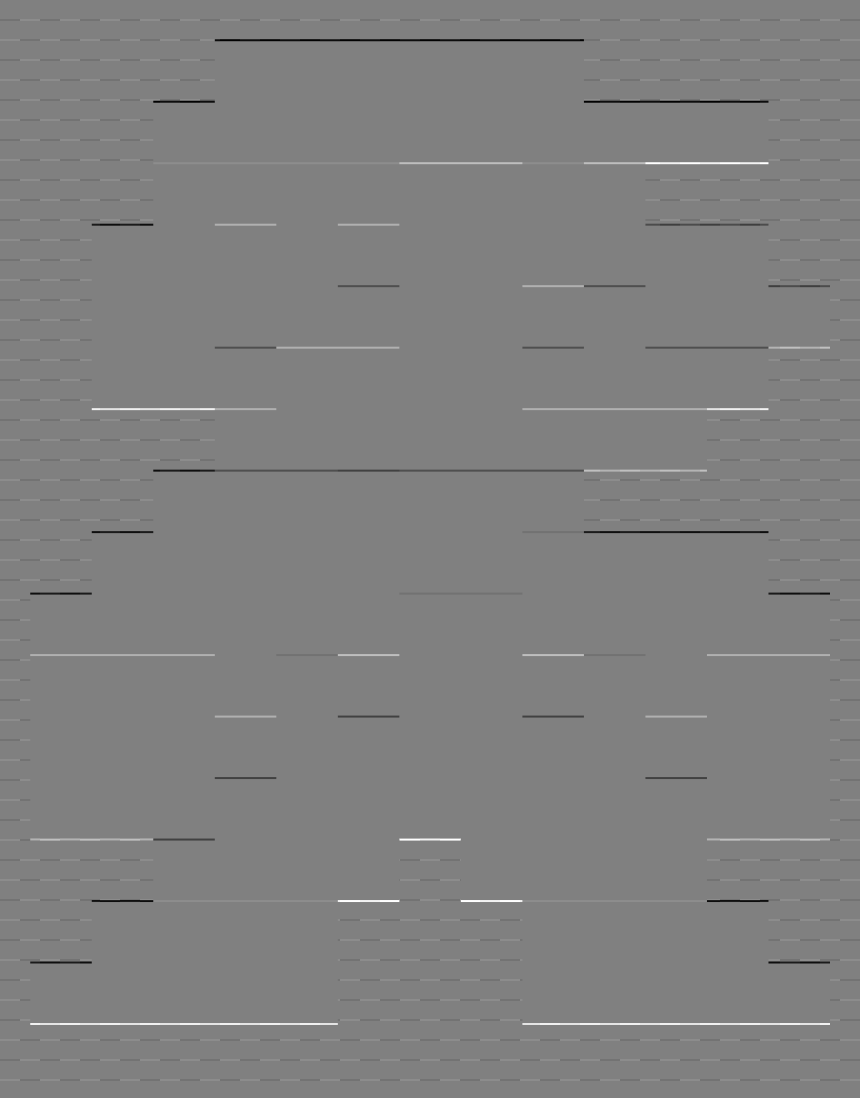

In [78]:
dx = np.zeros(3, dtype=np.float32)
dx[0] = -1
dx[2] = 1
dx = 1/2 * dx
print(f"Filtro derivata X: {dx}")
imgX = cv.filter2D(Ori_img, cv.CV_32F, dx)
va.show((imgX, "derivata lungo la x"))

Filtro derivata X: [[-0.5]
 [ 0. ]
 [ 0.5]]


derivata lungo la y
""

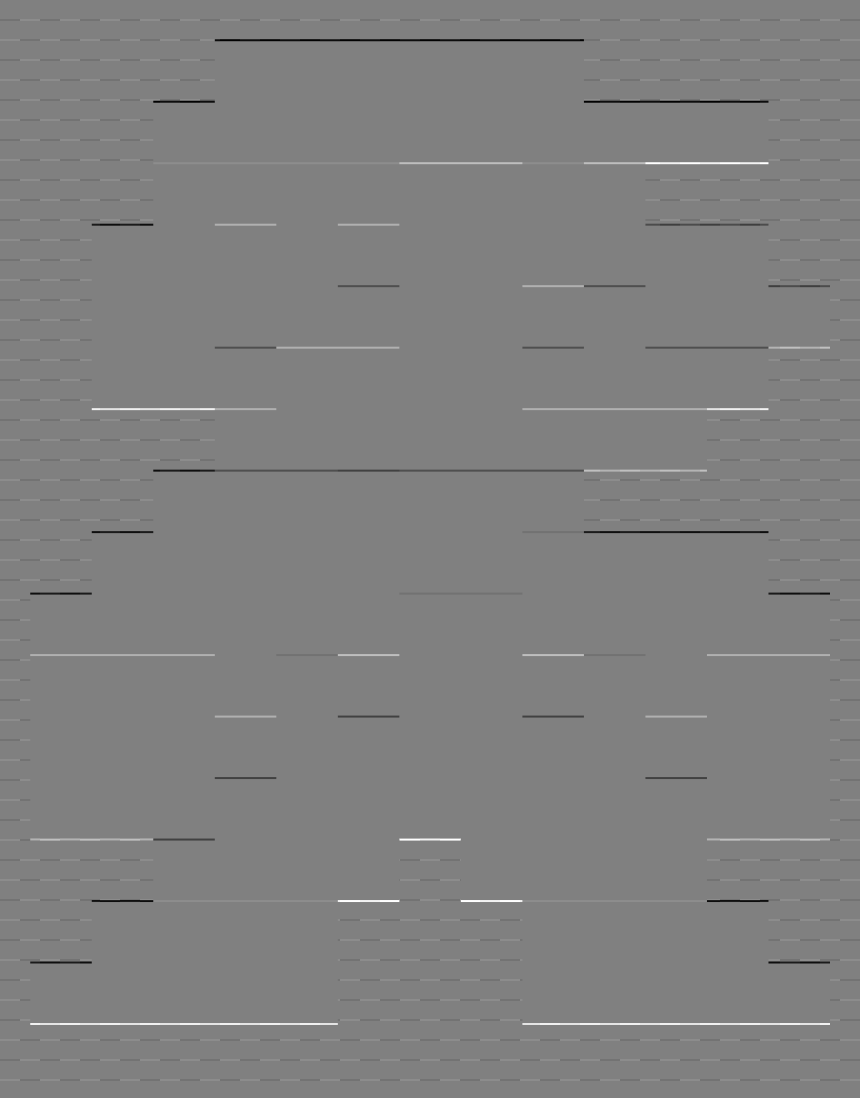

In [93]:
dy = np.zeros((3,1), dtype=np.float32)
dy[0, 0] = -1
dy[2, 0] = 1
dy = 1/2 * dy
print(f"Filtro derivata X: {dy}")
imgY = cv.filter2D(Ori_img, cv.CV_32F, dy)
va.show((imgY, "derivata lungo la y"))

### Sobel

derivata X,derivata Y,modulo di ogni pixel,normalizzato,angolo gradiente
,,,,

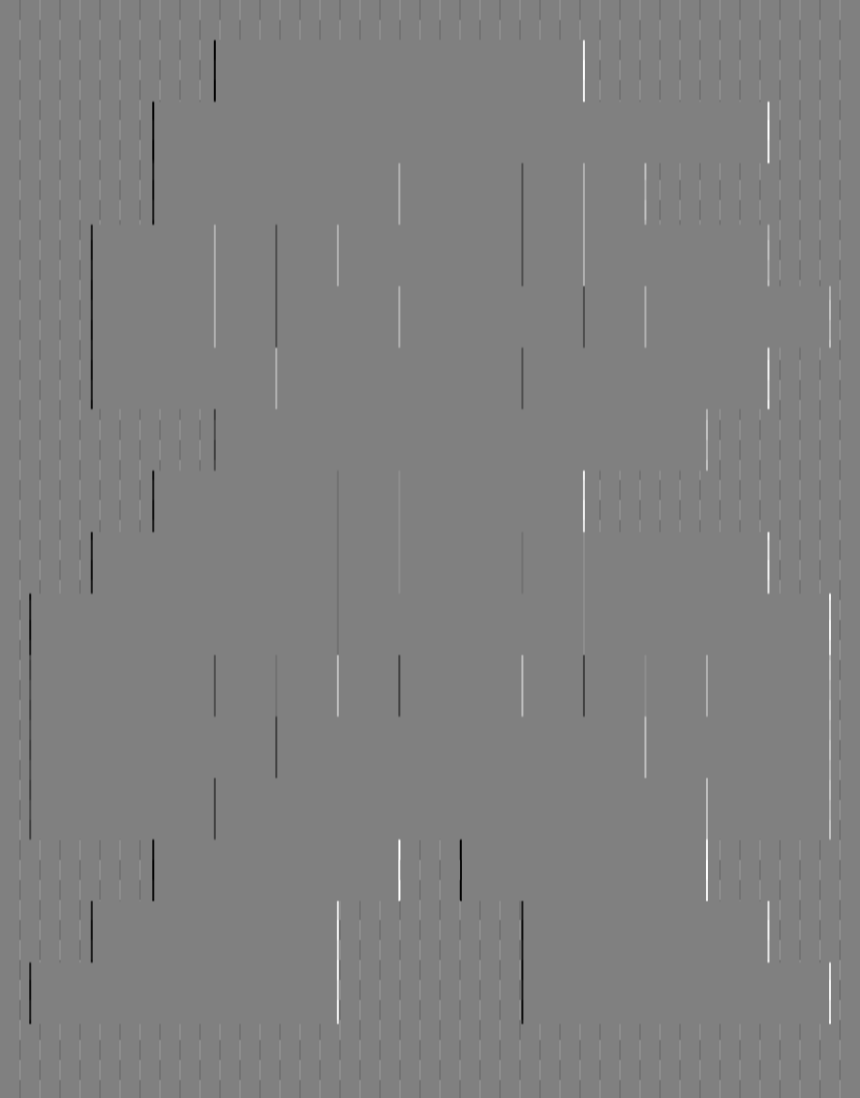
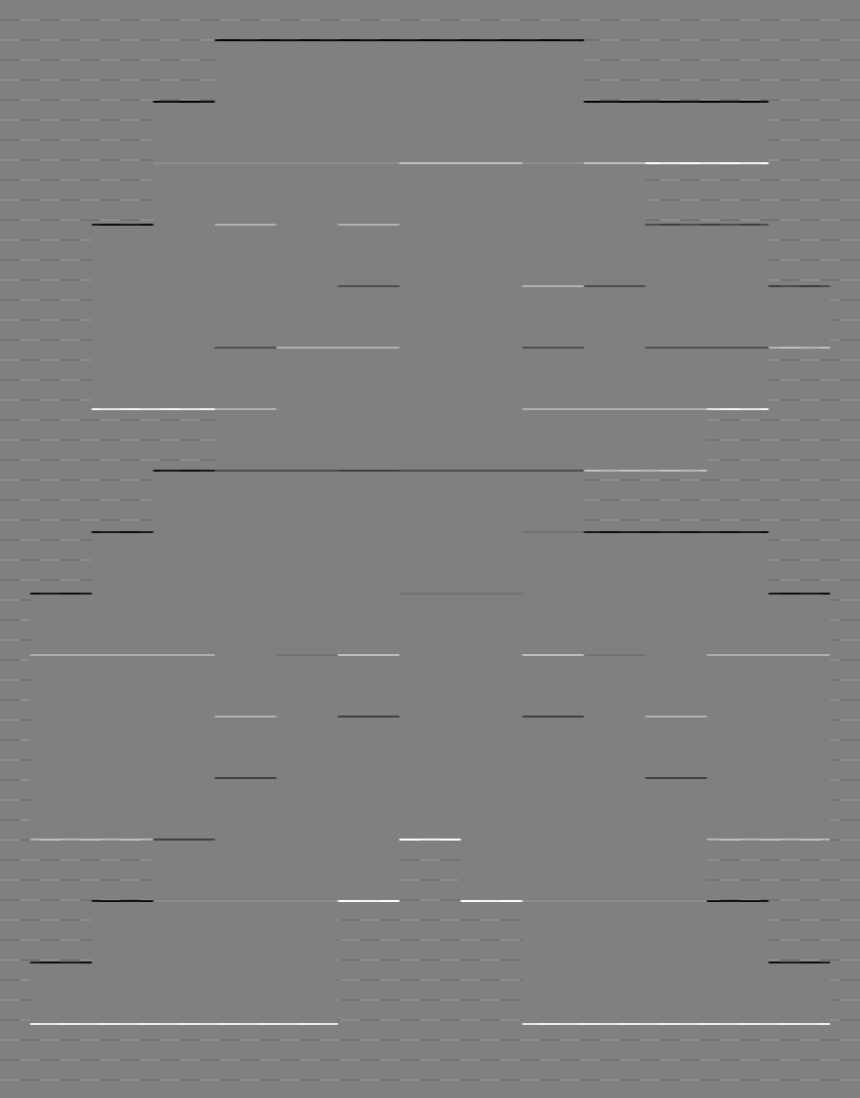
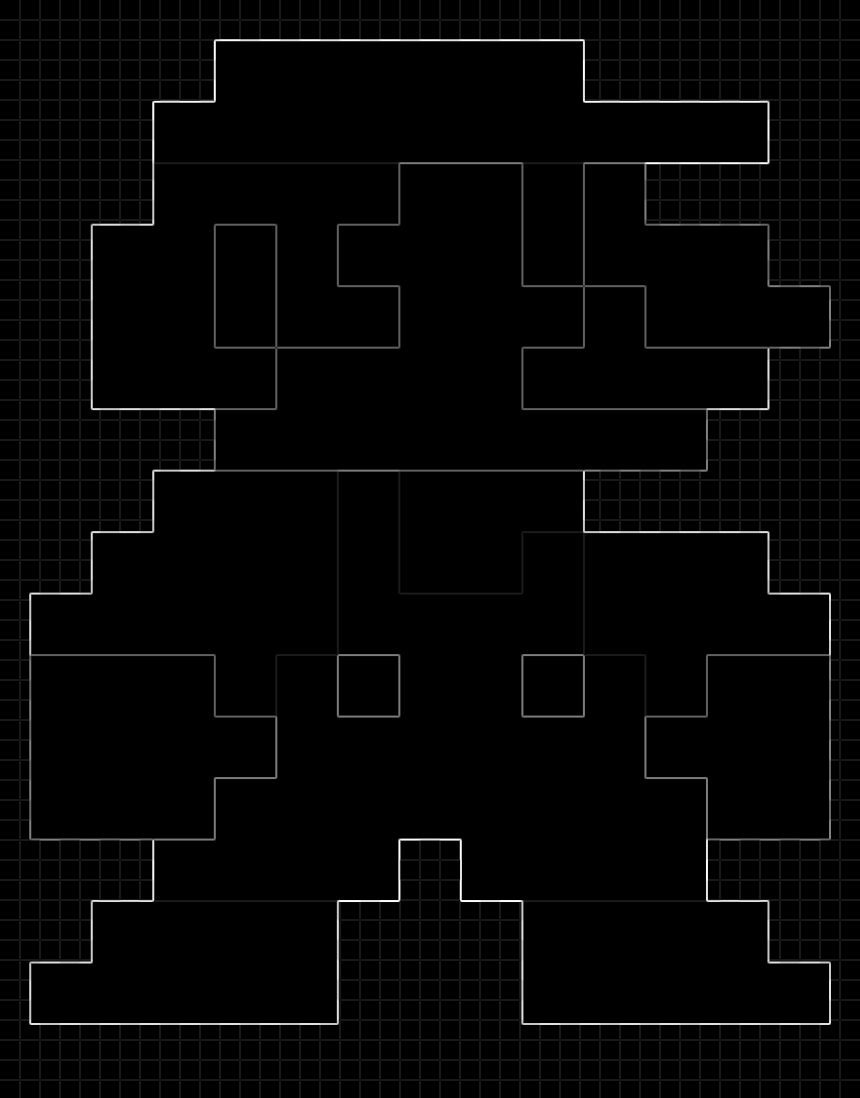
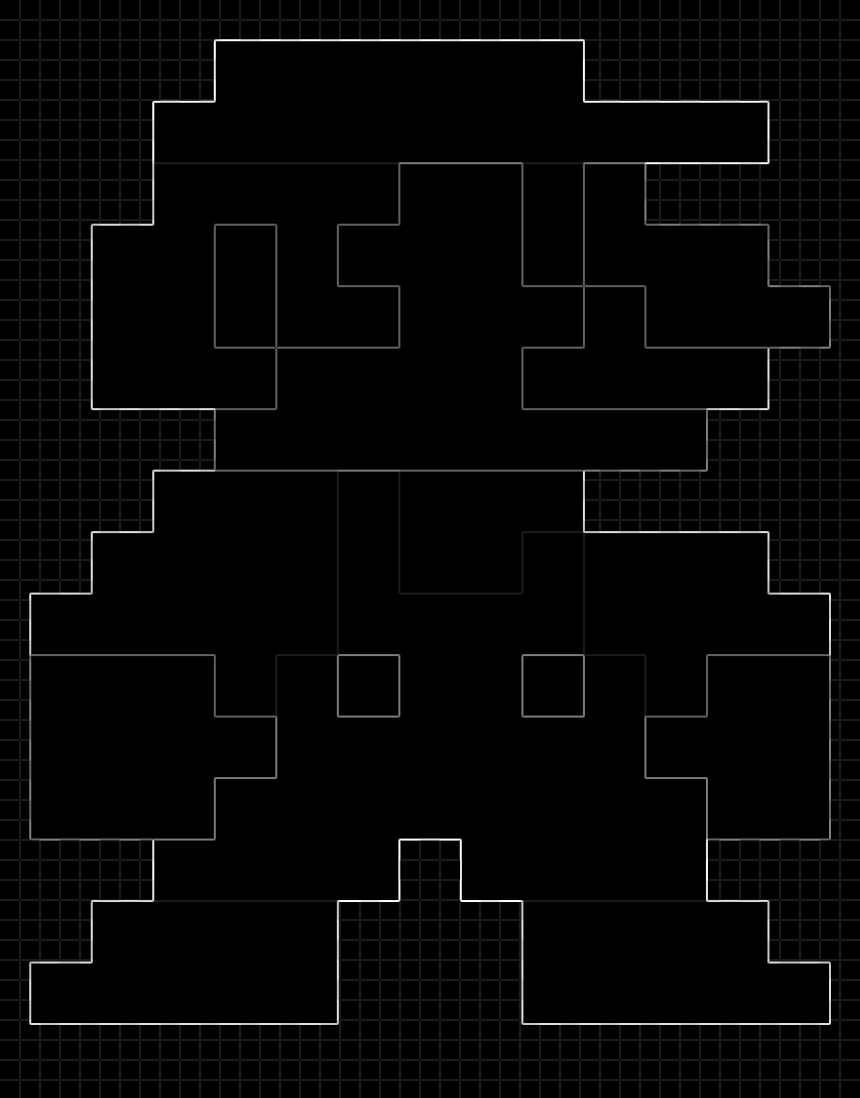
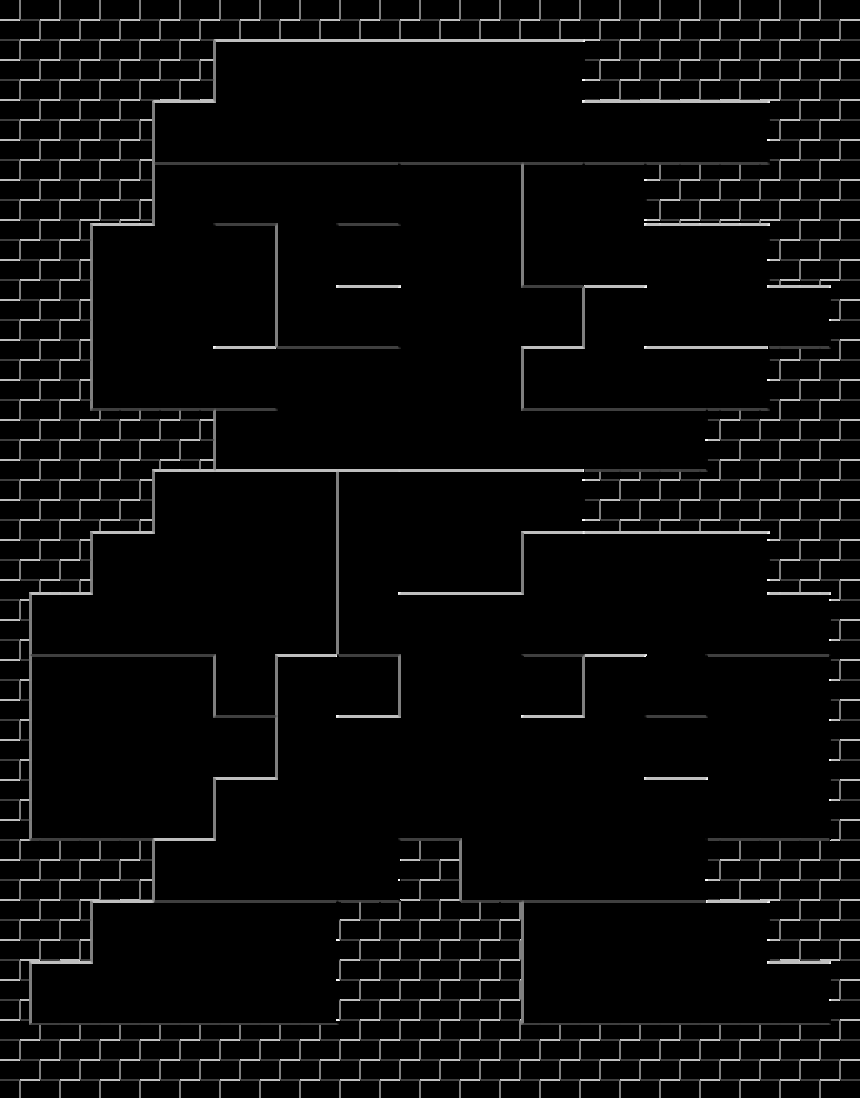

In [103]:
dx = cv.Sobel(Ori_img, cv.CV_32F, 1, 0)
dy = cv.Sobel(Ori_img, cv.CV_32F, 0, 1)
m = cv.magnitude(dx,dy)
ang = cv.phase(dx, dy)
m_norm = cv.normalize(m, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)
va.show((dx, "derivata X"), (dy, "derivata Y"), (m, "modulo di ogni pixel"), (m_norm, "normalizzato"), (ang, "angolo gradiente"))

### Sharr

derivata X,derivata Y,modulo di ogni pixel,normalizzato,angolo gradiente
,,,,

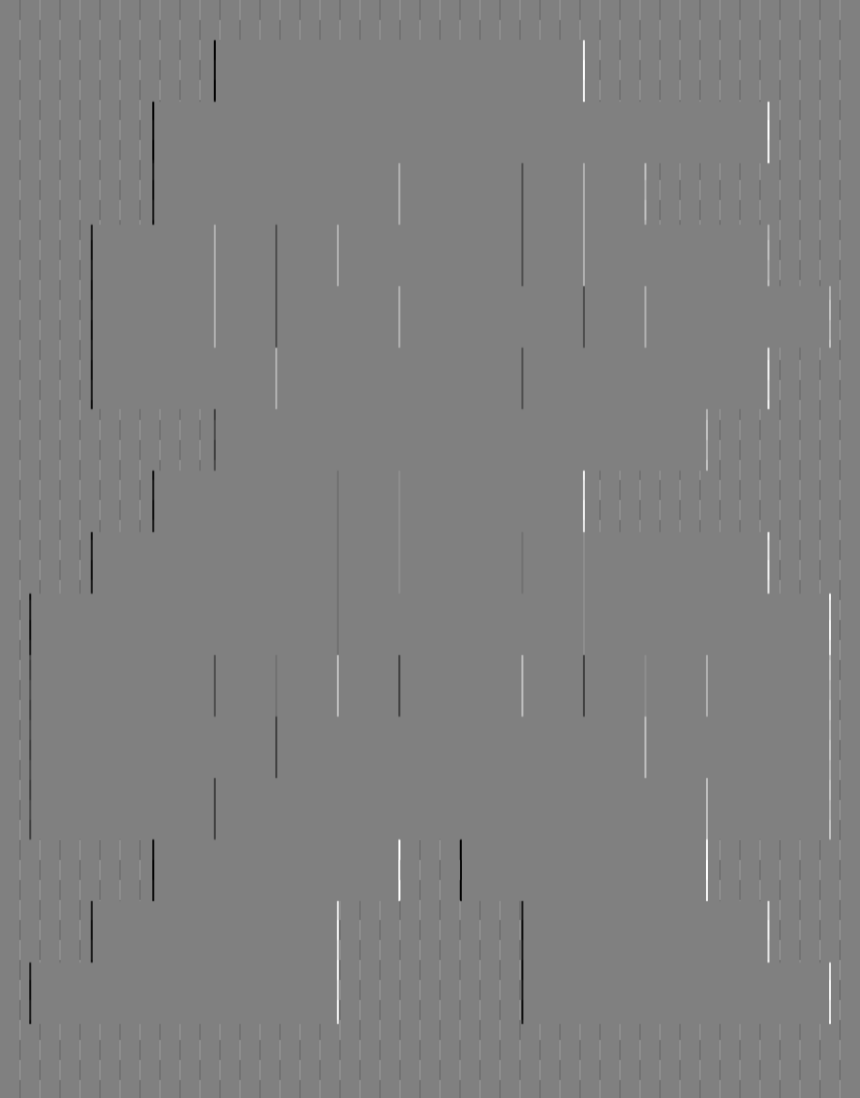
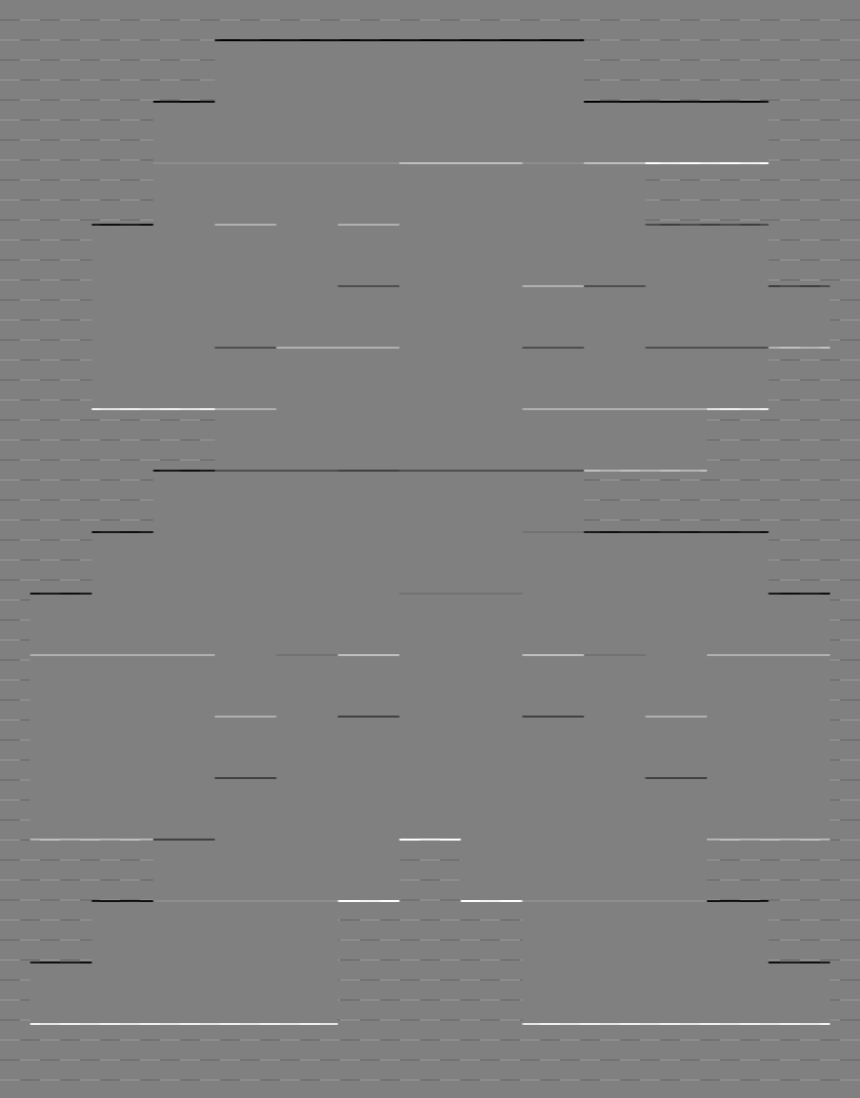
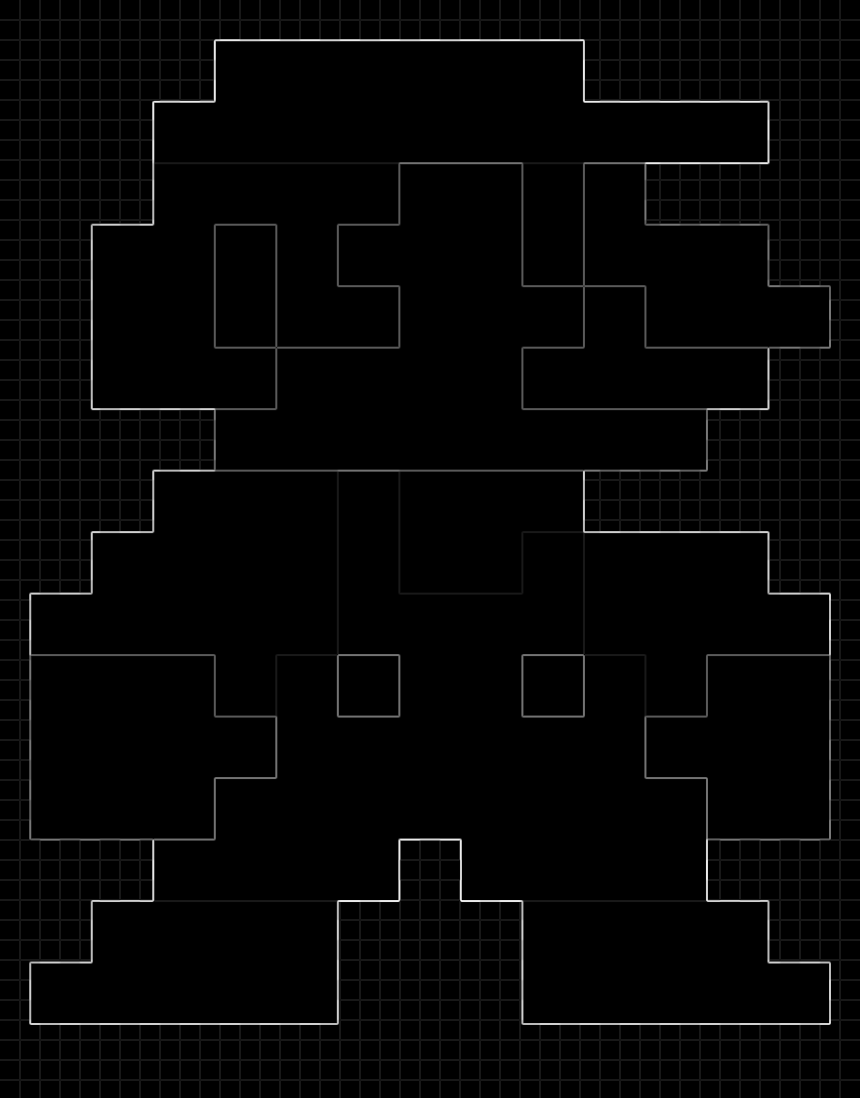
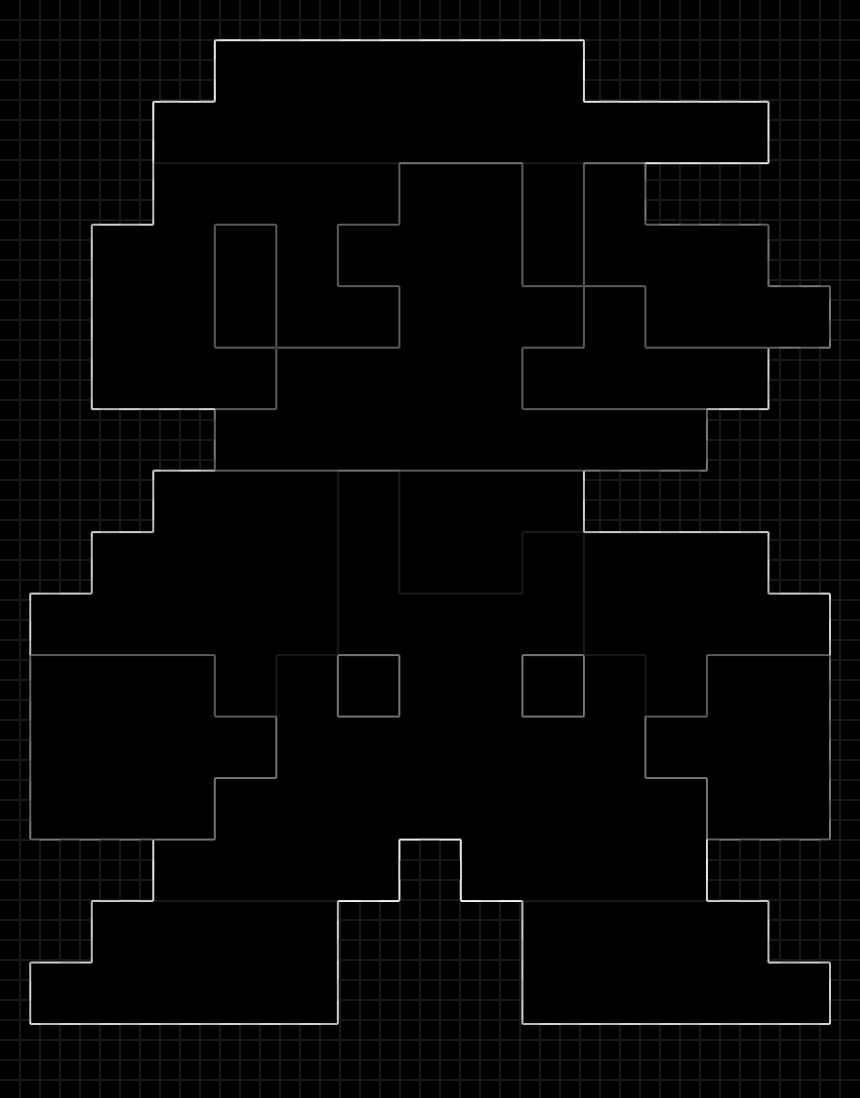
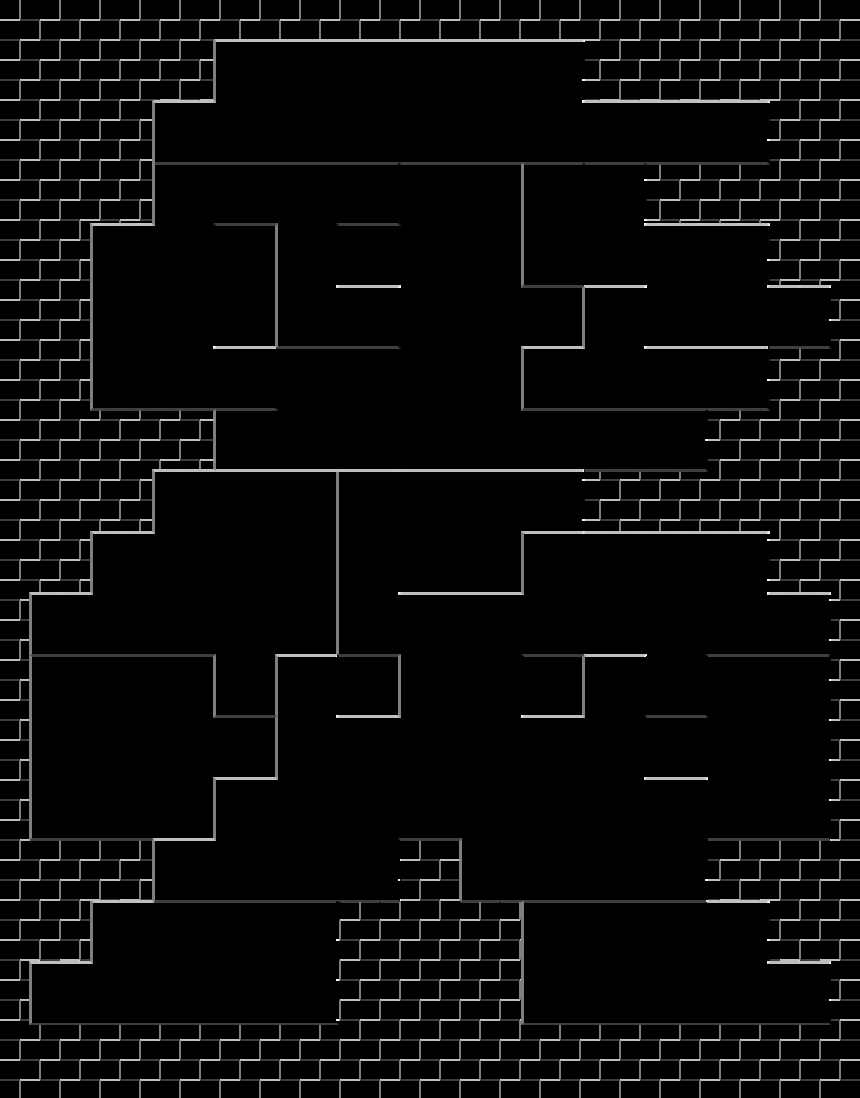

In [104]:
dx = cv.Scharr(Ori_img, cv.CV_32F, 1, 0)
dy = cv.Scharr(Ori_img, cv.CV_32F, 0, 1)
m = cv.magnitude(dx,dy)
ang = cv.phase(dx, dy)
m_norm = cv.normalize(m, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)

va.show((dx, "derivata X"), (dy, "derivata Y"), (m, "modulo di ogni pixel"),(m_norm, "normalizzato"), (ang, "angolo gradiente"))

### Canny

canny,bordi
,

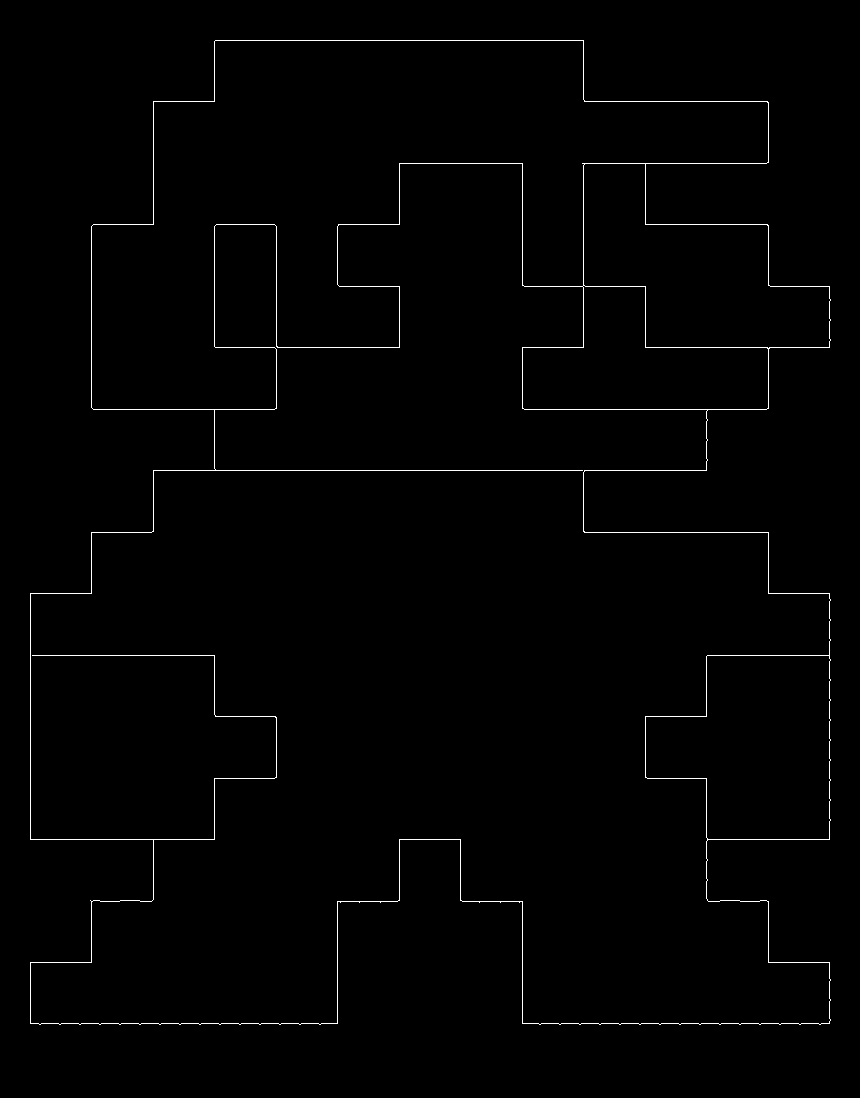
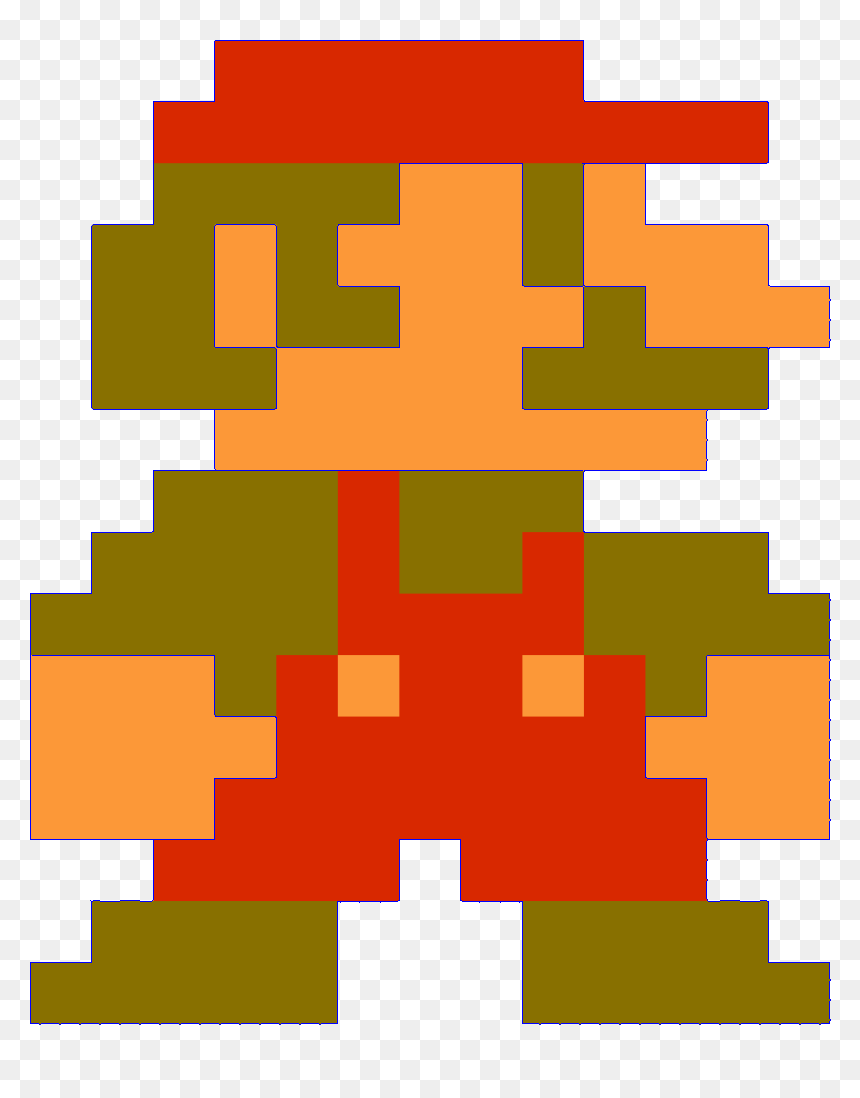

In [116]:
img = cv.imread("./mario2.png")

edges = cv.Canny(Ori_img, 80, 700)
img_e = img.copy()
img_e[edges != 0] = (255, 0, 0)
va.show((edges, "canny"), (img_e, "bordi"))

## Laplaciano

Laplaciano,Original Img,Bordi
,,

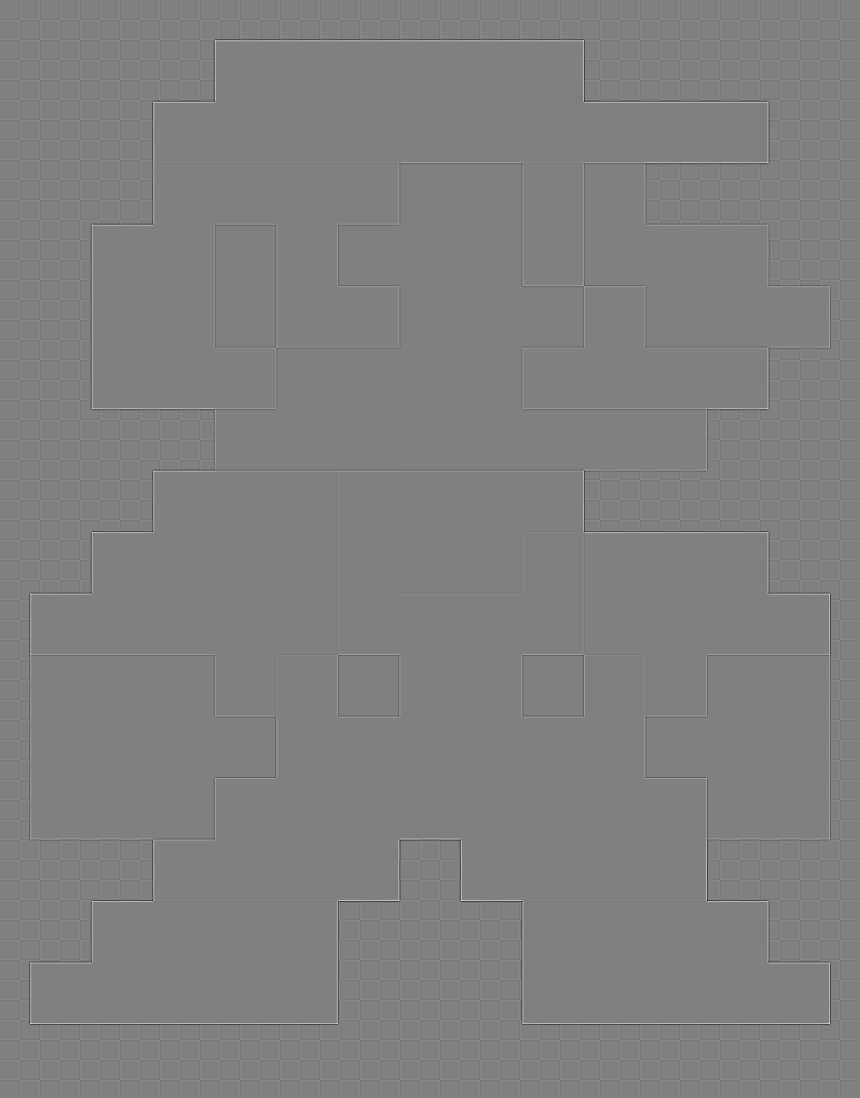
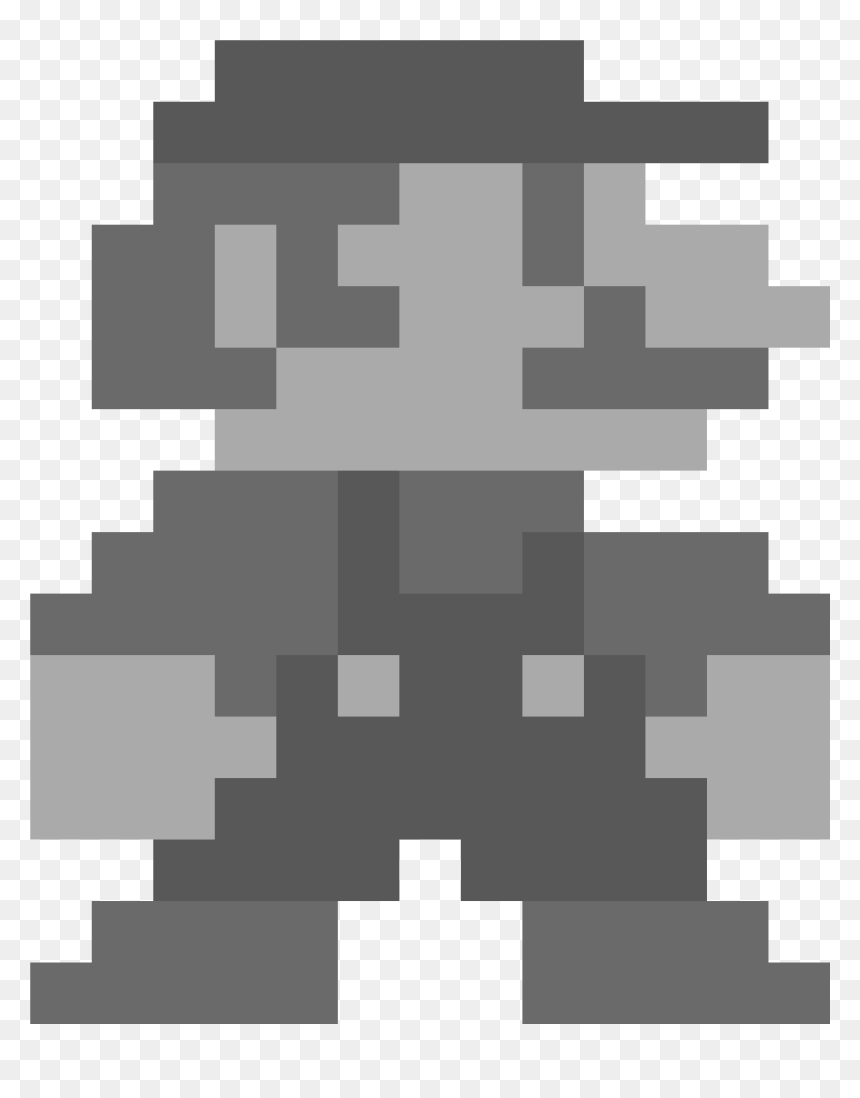
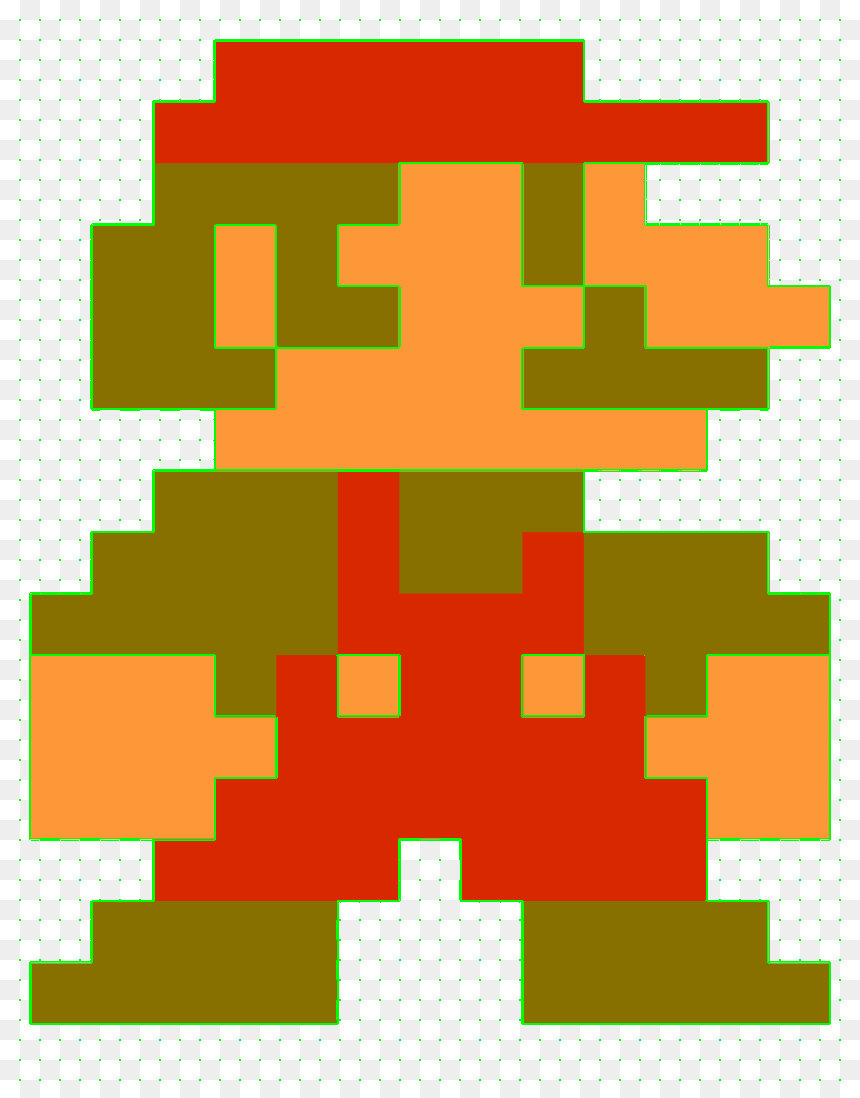

In [130]:
img = cv.imread("./mario2.png")

laplacian = cv.Laplacian(Ori_img, cv.CV_32F)
m = cv.magnitude(laplacian, laplacian)
img_l = img.copy()
img_l[m > 30] = (0, 255, 0)
va.show((laplacian, "Laplaciano"), (Ori_img, "Original Img"), (img_l, "Bordi"))

## Median Filter

Original IMG,Median Filter
,

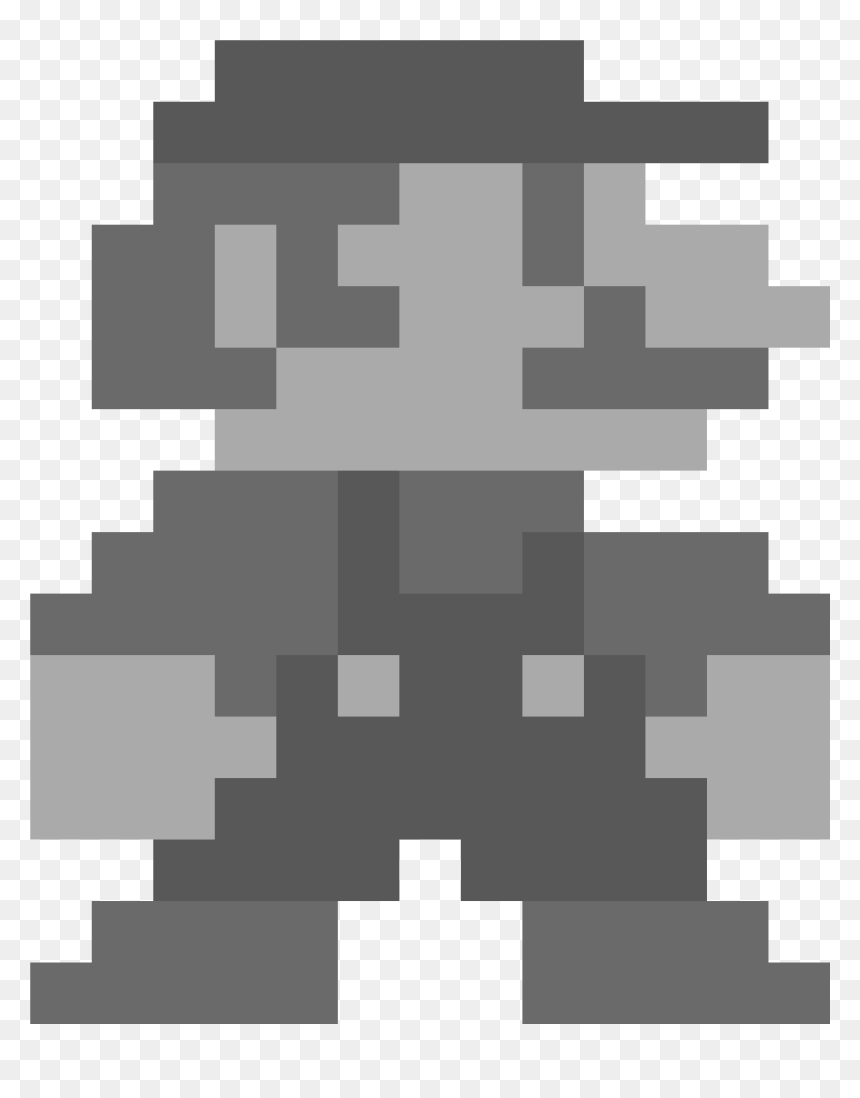
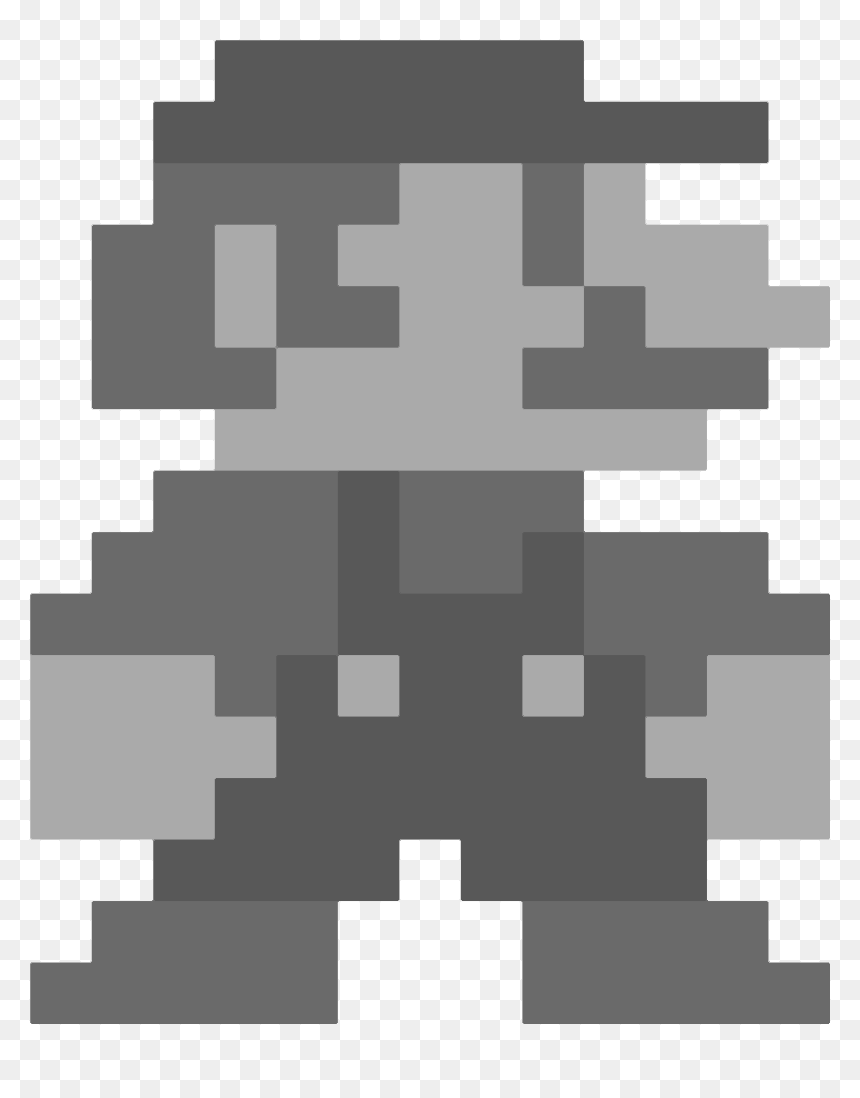

In [119]:
blr = cv.medianBlur(Ori_img, 3)
va.show((Ori_img, "Original IMG"), (blr, "Median Filter"))